/var/folders/1y/f431dfd55sgcrd9ymcz950th0000gn/T/ipykernel_87397/2487387755.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  agg_time_series_transposed = time_series_transposed.resample('2M').sum() #
/Users/yanndevance/anaconda3/envs/ada/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/yanndevance/anaconda3/envs/ada/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/yanndevance/anaconda3/envs/ada/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/yanndevance/anaconda3/envs/ada/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since funct

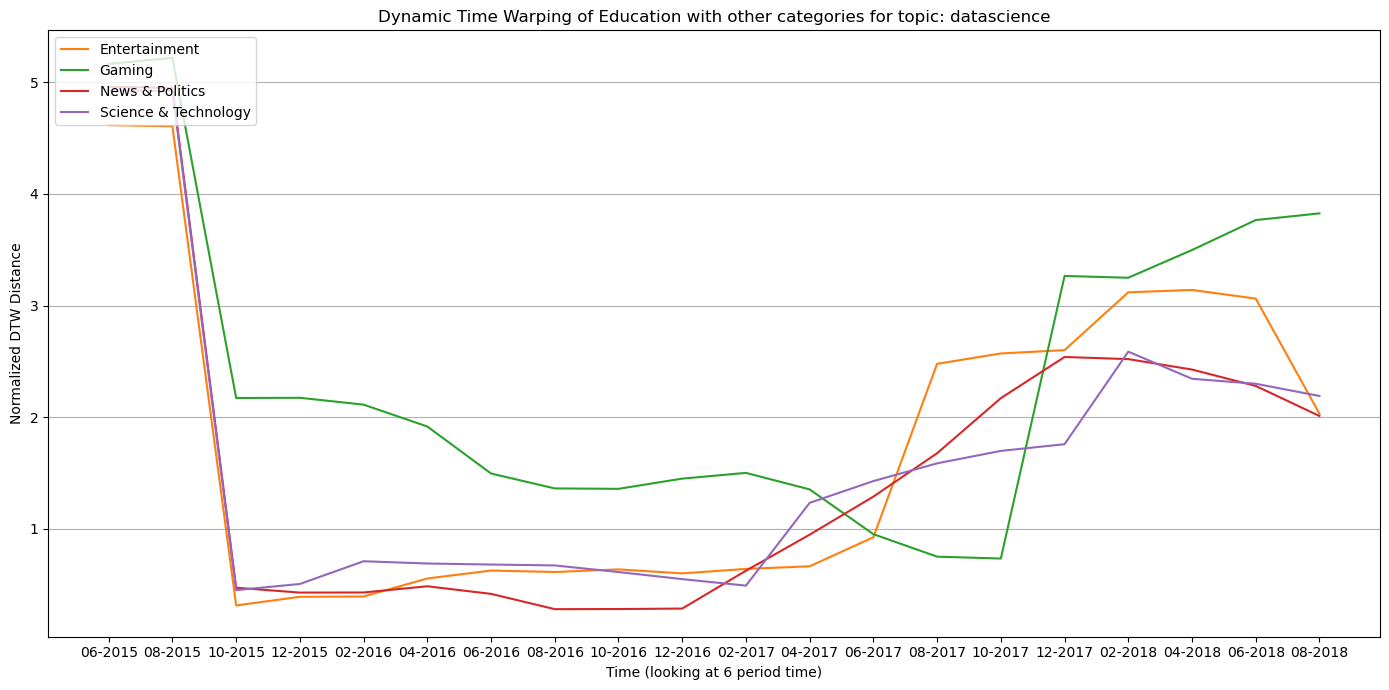

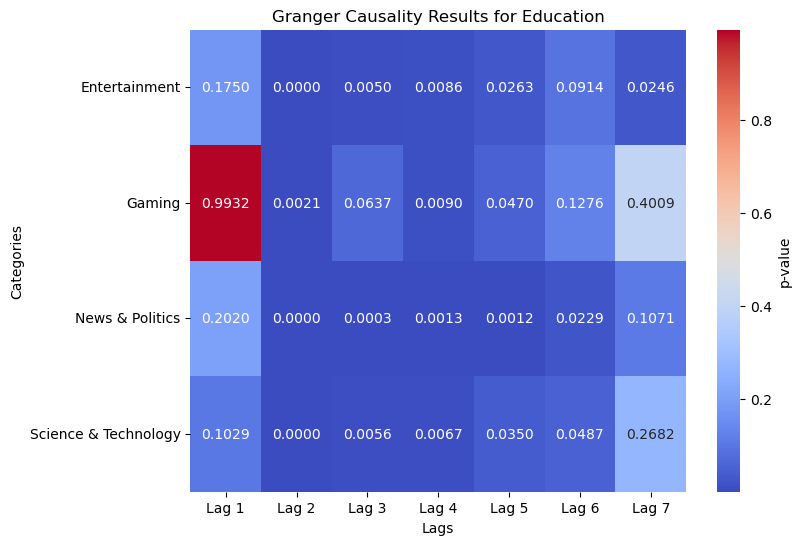

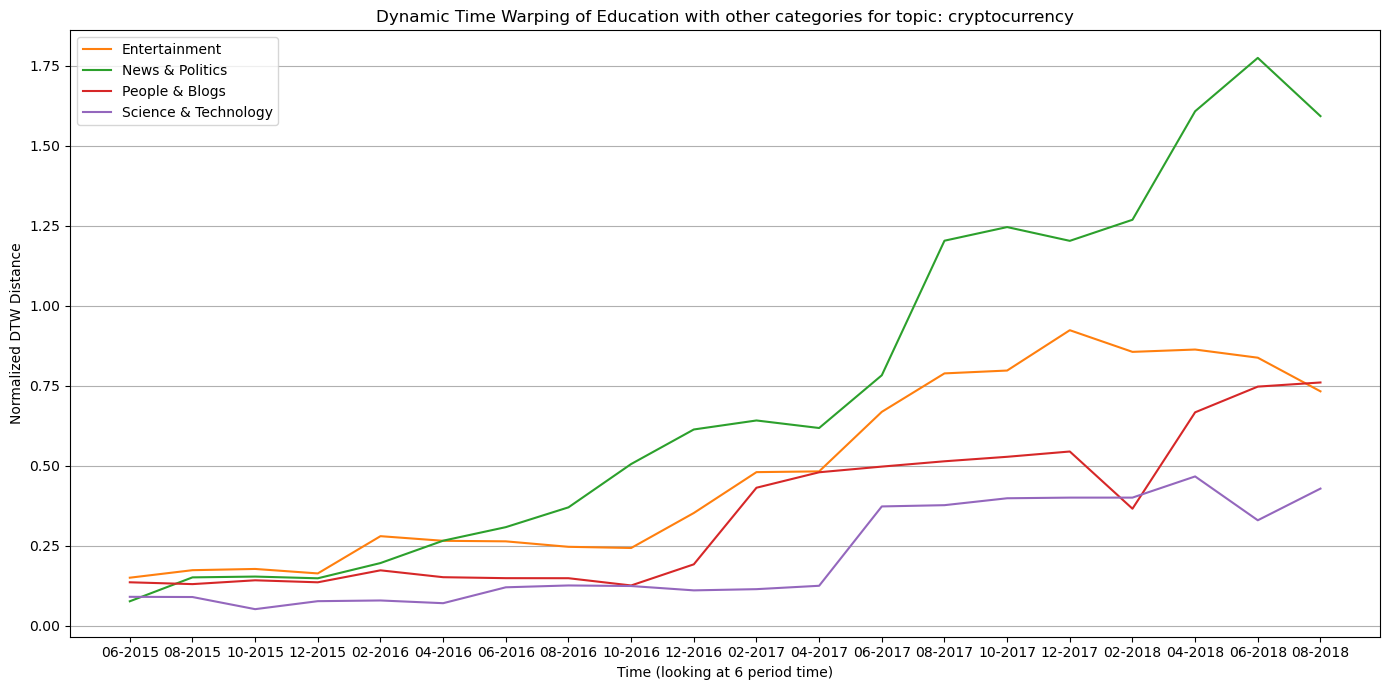

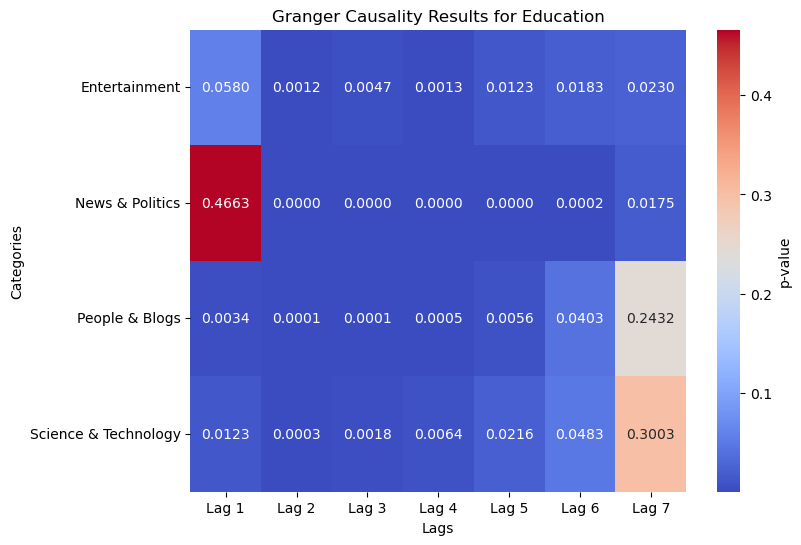

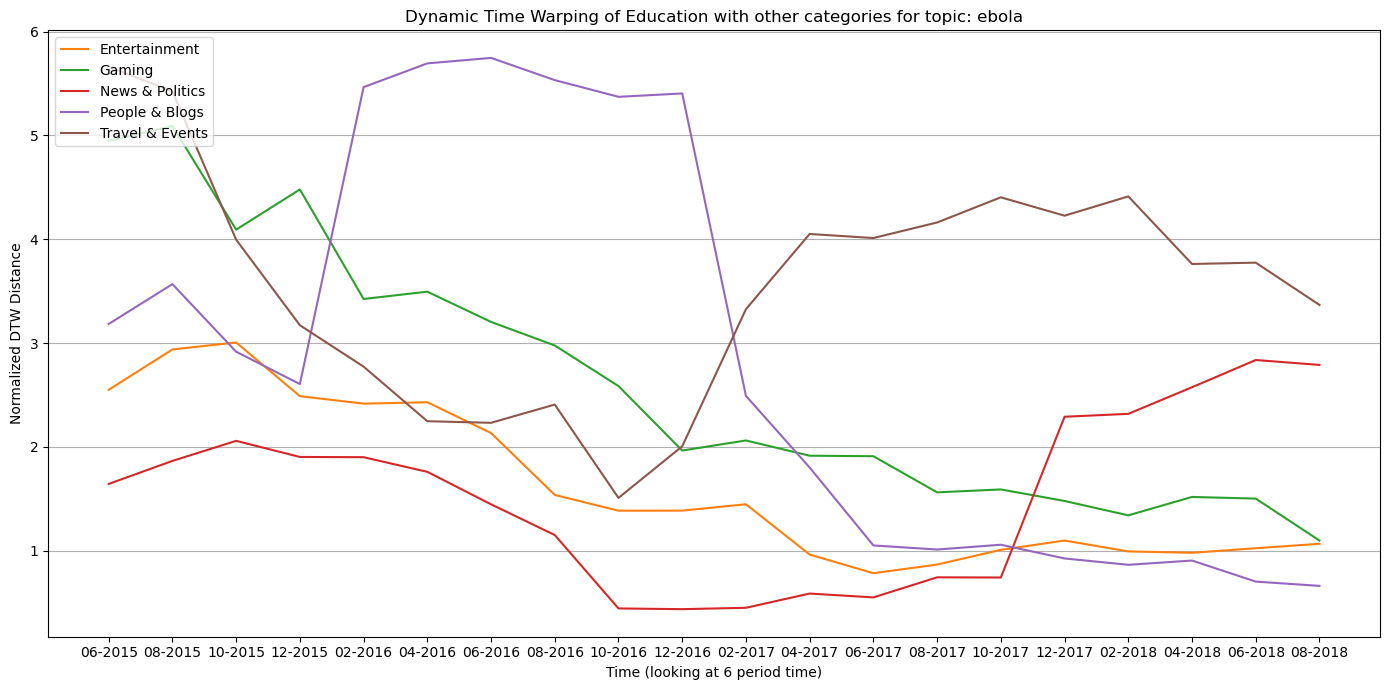

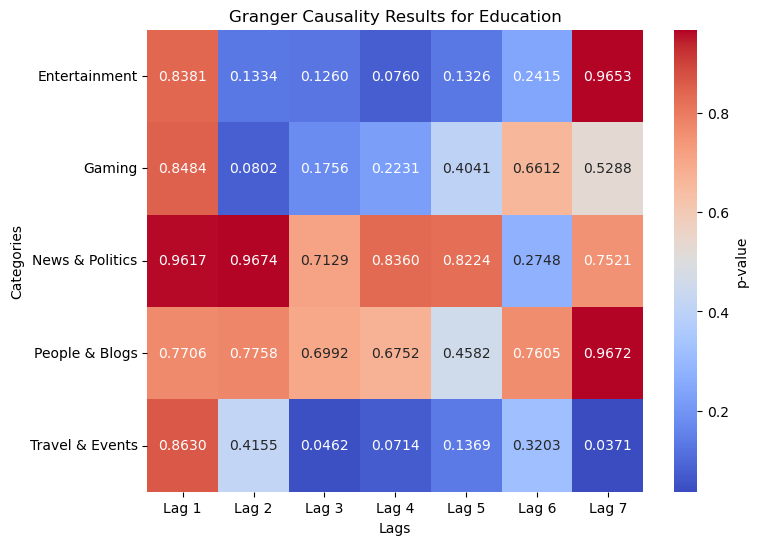

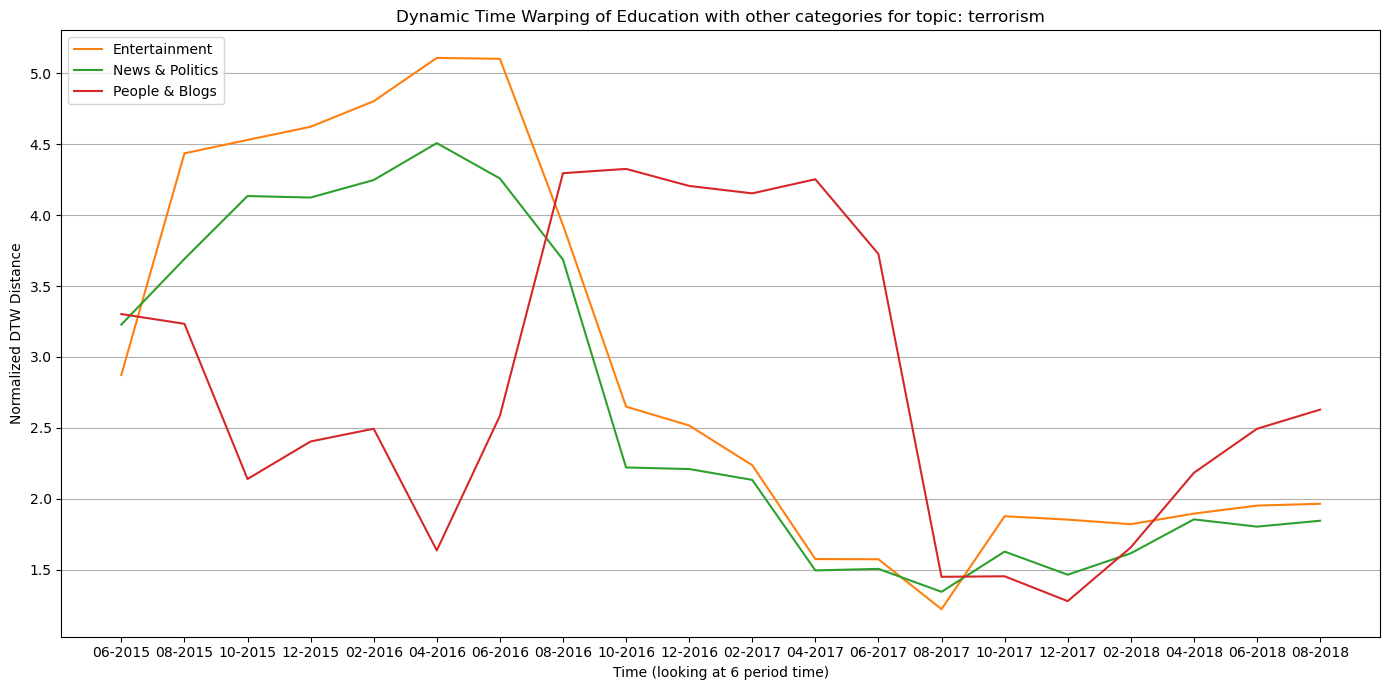

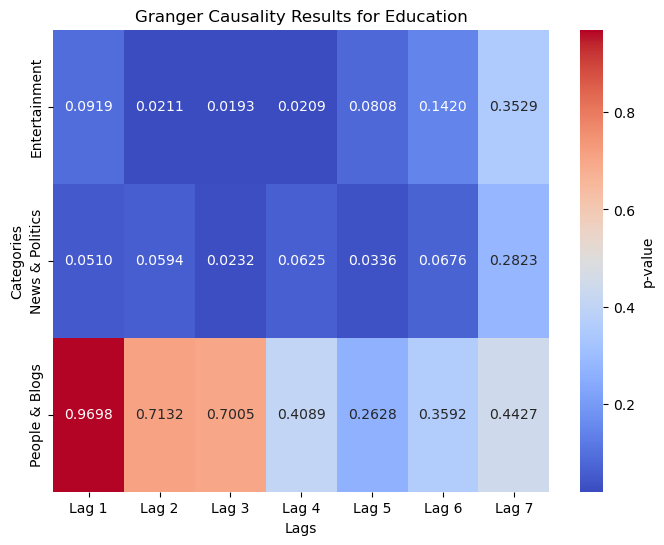

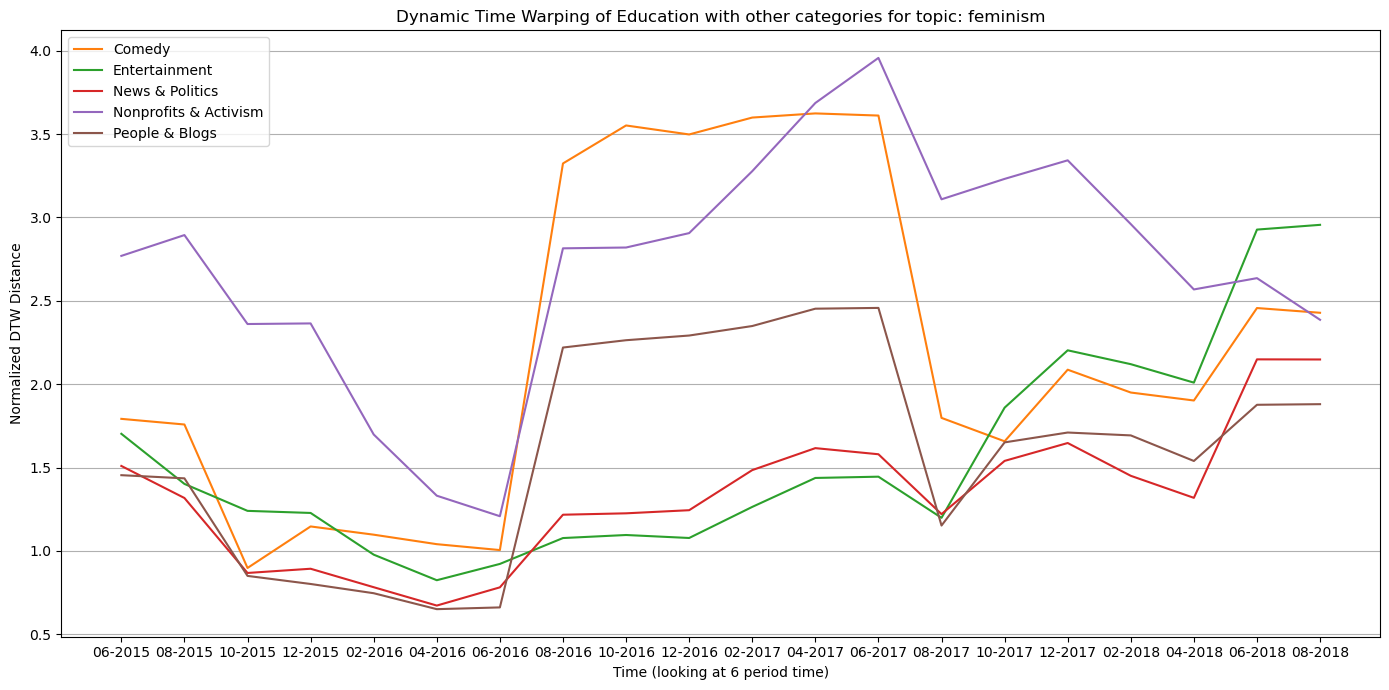

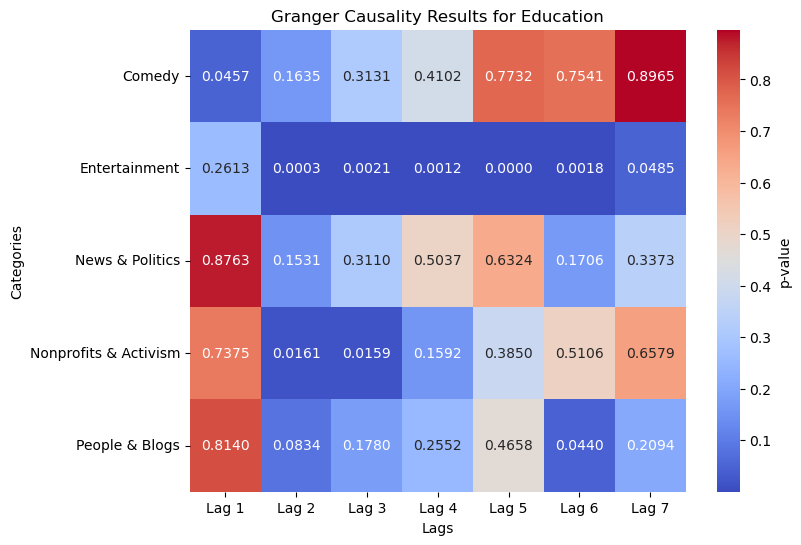

In [4]:
import importlib
import causality
importlib.reload(causality)
from causality import *

topics = {
    "datascience": ["machine learning", "deep learning", "artificial intelligence"],
    "cryptocurrency": ["crypto", "cryptocurrency", "bitcoin", "ethereum", "binance"],
    "ebola": ["ebola"],
    "terrorism": ["bin laden", "Jihadism", "Al-Qaeda"],
    "feminism": ["feminism", "metoo", "#metoo", "me too", "gender equality", "misogyny", "toxic masculinity"]
}

for topic in topics:

    time_series_df = pd.read_csv(os.path.join('data/derivatives/time_series_df', topic + '_time_series.csv'))

    time_series_df.set_index('categories', inplace=True)
    time_series_df.columns = pd.to_datetime(time_series_df.columns, format='%Y-%m')
    time_series_transposed = time_series_df.T
    time_series_transposed.index = pd.to_datetime(time_series_transposed.index, format='%Y-%m')
    agg_time_series_transposed = time_series_transposed.resample('2M').sum() # 
    agg_time_series_df = agg_time_series_transposed.T

    rolling_dtw_results = rolling_dtw_analysis(agg_time_series_df, topic = topic, target_series_name='Education', window_size=6, save_path= 'data/figures/causality/' + topic + '_rolling_dtw')
    granger_results = granger_causality_analysis(agg_time_series_df, target_series_name='Education', max_lag=7, save_path= 'data/figures/causality/' + topic + '_granger')